# РК1

Коваленко В.И. ИУ5-23М

Вариант 2

Задание 2, 22

## Описание набора данных

Набор данных "Кеплер" содержит данные о потенциальных экзопланетах, обнаруженных космическим телескопом НАСА "Кеплер". Этот набор данных предназначен для использования в моделях машинного обучения для анализа свойств экзопланет и прогнозирования характеристик планет. Он включает в себя такие характеристики планет, как радиус, равновесная температура, период обращения, свойства звезд и показатели обнаружения.



### Описание колонок

1. **kepid** – Уникальный идентификатор звезды-хозяина.
2. **kepoi_name** – Уникальный идентификатор планетарного кандидата.
3. **koi_disposition** – Статус кандидата в экзопланету (преобразованный в числовые значения):
   1. "CANDIDATE" -> 1 (Потенциальная экзопланета)
   2. "CONFIRMED" -> 2 (Подтвержденная экзопланета)
   3. "FALSE POSITIVE" -> 0 (Не настоящая экзопланета)
4. **koi_score** – Оценка достоверности планетарной классификации (более высокие значения указывают на более высокую степень достоверности).
5. **koi_period** – Период обращения планеты вокруг своей оси (в днях).
6. **koi_prad** – Расчетный радиус планеты (в радиусах Земли).
7. **koi_teq** – Расчетная равновесная температура планеты (Кельвин).
8. **koi_insol** – Поток инсоляции, получаемый планетой (относительно инсоляции Земли).
9. **koi_steff** – эффективная температура звезды-хозяина (Кельвин).
10. **koi_srad** – радиус звезды (в солнечных радиусах).
11. **koi_slogg** – Поверхностная гравитация звезды-хозяина (логарифмическая шкала, в см/с2).
12. **koi_kepmag** – звездная величина кеплеровского диапазона (яркость звезды, наблюдаемая аппаратом Kepler).


## Подготовка данных

### 1. Импорт библиотек

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

### 2. Загрузка данных

In [6]:
try:
    data = pd.read_csv('exoplanets_data.csv')
    print("Данные успешно загружены!")
except FileNotFoundError:
    print("Ошибка: Файл не найден. Убедитесь, что он находится в рабочей директории.")

Данные успешно загружены!


### 3. Обработка данных

In [11]:
print("\nИнформация о данных:")
data.describe()


Информация о данных:


,kepid,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
count,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.00000,9564.000000,9564.000000,9564.000000
mean,7.690628e+06,0.780845,0.480829,75.671358,102.891778,1085.385828,7.745737e+03,5706.82328,1.728712,4.310157,14.264606
std,2.653459e+06,0.863026,0.437658,1334.744046,3018.662296,839.940895,1.565099e+05,781.58775,6.009769,0.424316,1.385376
min,7.574500e+05,0.000000,0.000000,0.241843,0.080000,25.000000,0.000000e+00,2661.00000,0.109000,0.047000,6.966000
25%,5.556034e+06,0.000000,0.000000,2.733684,1.430000,553.000000,2.216000e+01,5333.00000,0.835750,4.232750,13.440000
50%,7.906892e+06,0.000000,0.480829,9.752831,2.490000,906.000000,1.583200e+02,5745.00000,1.006500,4.432000,14.520000
75%,9.873066e+06,2.000000,0.995000,40.715178,21.712500,1352.500000,1.110257e+03,6099.00000,1.435250,4.539000,15.322000
max,1.293514e+07,2.000000,1.000000,129995.778400,200346.000000,14667.000000,1.094755e+07,15896.00000,229.908000,5.364000,20.003000


In [13]:
# Создание бинарной целевой переменной
data['target'] = (data['koi_disposition'] == 'CONFIRMED').astype(int)

# Обработка пропусков (пример для числовых колонок)
numeric_cols = ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_srad', 'koi_slogg', 'koi_kepmag']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

print("\nПропуски после обработки:\n", data[numeric_cols].isnull().sum())


Пропуски после обработки:
 koi_period    0
koi_prad      0
koi_teq       0
koi_insol     0
koi_steff     0
koi_srad      0
koi_slogg     0
koi_kepmag    0
dtype: int64


### Задание 1

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "target (mean) encoding".

In [15]:
# Создаем категориальный признак из числового
data['koi_score_category'] = pd.cut(
    data['koi_score'],
    bins=[0, 0.5, 0.8, 1],
    labels=['Low', 'Medium', 'High']
)

# Target Encoding для нового признака
mean_encoding = data.groupby('koi_score_category')['target'].mean().to_dict()
data['koi_score_encoded'] = data['koi_score_category'].map(mean_encoding)

# Результат
print("\nРезультат кодирования:")
data[['koi_score', 'koi_score_category', 'koi_score_encoded']].sample(5)


Результат кодирования:


<ipython-input-15-05f8d807fd58>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_encoding = data.groupby('koi_score_category')['target'].mean().to_dict()


,koi_score,koi_score_category,koi_score_encoded
6015,0.000,NaN,NaN
2752,1.000,High,0.0
671,0.999,High,0.0
8649,0.000,NaN,NaN
1458,0.987,High,0.0


### Задание 2

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по максимальному значению.

In [17]:
# Масштабирование 'koi_period' по максимальному значению
max_value = data['koi_period'].max()
data['koi_period_scaled'] = data['koi_period'] / max_value

print("\nМасштабированные значения:")
data[['koi_period', 'koi_period_scaled']].describe()


Масштабированные значения:


,koi_period,koi_period_scaled
count,9564.000000,9564.000000
mean,75.671358,0.000582
std,1334.744046,0.010268
min,0.241843,0.000002
25%,2.733684,0.000021
50%,9.752831,0.000075
75%,40.715178,0.000313
max,129995.778400,1.000000


### Дополнительное задание

Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

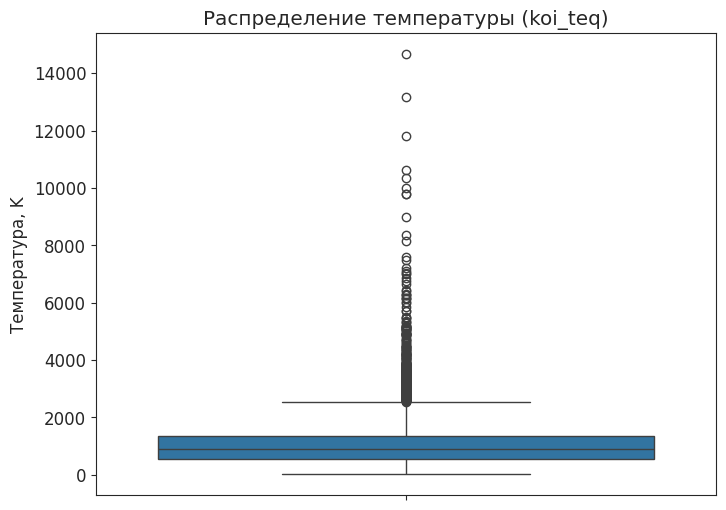

In [21]:
# Boxplot для 'koi_teq' (равновесная температура)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='koi_teq')
plt.title('Распределение температуры (koi_teq)')
plt.ylabel('Температура, K')
plt.show()